In [2]:
#Pratham Shah

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
import pandas as pd
df1=pd.read_csv('../data/raw/amazon 2.csv')

# PRATHAM SHAH


## Research question/interests


**1. Predicting trends in Customer behaviour(Number of Ratings) with respect to the discount price and taking in context the ratings of the product** 
By this I want to explore the relationship between product discounts and their effect on ratings. Further I want to evaluate the trends in rating with respect to the price and category of the product, namely (Computers and Accessories and Electronics and wearables). 

**2. Trends between the discounted percentage and the actual price of the product**
By this I want to explore the trends of how the price of the product affects the discount percentage of the product. 

**3. Price segment and ratings** 
By this I want to divide the data set into various price segement and see which particular price segment has maximum ratings and reviews, signifying higher sales of that particular price segment.

**4. For a particular category and it's description (eg Computer and accessories) what prices have similar product description and how does it affect the ratings and reviews of the products**


In [4]:
df1.head() #First few rows of the data set

df1.shape # shape of the dataset


df1.dtypes #  data types of each variable


df1.isnull().sum() # Check for missing values


df1.columns #Number of columns


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
#We known from the following about all the columns in this data set. Therefore there are 16 columns.  

In [5]:
df1.dropna(axis=0,how="any",inplace=True) #Removing null values frim data set
df1.isna().sum() # Check if the null values have been removed

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

#My EDA is based on 'Discount price', 'rating count', 'category' ,'discount percentage'

In [6]:
print(df1['rating'].unique()) #Find unique values of the 'rating' column

['4.2' '4.0' '3.9' '4.1' '4.3' '4.4' '4.5' '3.7' '3.3' '3.6' '3.4' '3.8'
 '3.5' '4.6' '3.2' '5.0' '4.7' '3.0' '2.8' '4' '3.1' '4.8' '2.3' '|' '2'
 '3' '2.6' '2.9']


In [39]:
df1.loc[df1.rating == '|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,category_grouped
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099,2499.0,16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle..."


In [40]:
df1.drop(index=1279 , inplace= True)
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1462 non-null   object
 1   product_name         1462 non-null   object
 2   category             1462 non-null   object
 3   discounted_price     1462 non-null   object
 4   actual_price         1462 non-null   object
 5   discount_percentage  1462 non-null   object
 6   rating               1462 non-null   object
 7   rating_count         1462 non-null   object
 8   about_product        1462 non-null   object
 9   user_id              1462 non-null   object
 10  user_name            1462 non-null   object
 11  review_id            1462 non-null   object
 12  review_title         1462 non-null   object
 13  category_grouped     1462 non-null   object
dtypes: object(14)
memory usage: 91.4+ KB


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,category_grouped
count,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462
unique,1348,1334,211,550,449,92,27,1142,1290,1191,1191,1191,1191,211
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,199,999.0,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...",Computers&Accessories|Accessories&Peripherals|...
freq,3,5,231,52,118,56,244,9,6,10,10,10,10,231


In [7]:
#column names in dataframe
print(df1.columns)




Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [65]:
ned=df1['category'].str.split('|', expand=True)[0].to_numpy()
ned

array(['Computers&Accessories', 'Computers&Accessories',
       'Computers&Accessories', ..., 'Home&Kitchen', 'Home&Kitchen',
       'Home&Kitchen'], dtype=object)

In [58]:
df1.groupby(['category']).mean()

,discounted_price,rating
category,,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,2339.000000,4.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,221.500000,4.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,649.000000,4.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,574.000000,3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,749.000000,4.0
...,...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",150.000000,4.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",255.000000,4.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",329.000000,4.0


In [25]:
discount_list=[]
actual_list =[]
for discount, actual in zip(df1['discounted_price'].values, df1['actual_price'].values):
    temp_discount = str(discount).replace("₹","").replace(",", "")
    temp_actual = str(actual).replace("₹","").replace(",", "")
    discount_list.append(temp_discount)
    actual_list.append(temp_actual)

df1['discounted_price']= discount_list
df1['actual_price'] = actual_list
df1.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category_grouped
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099.0,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories|Accessories&Peripherals|...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349.0,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories|Accessories&Peripherals|...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899.0,90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories|Accessories&Peripherals|...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699.0,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories|Accessories&Peripherals|...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399.0,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories|Accessories&Peripherals|...


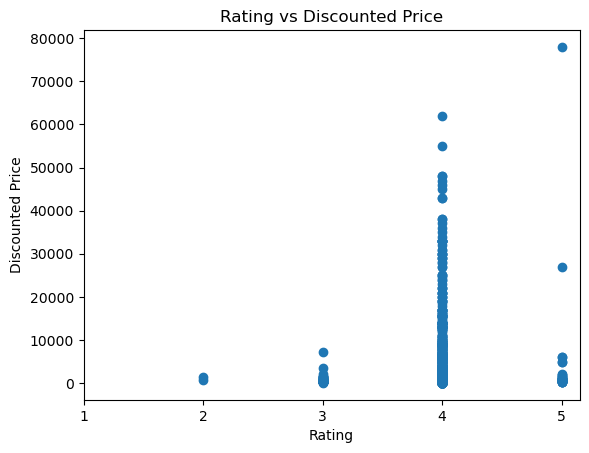

In [56]:
df1['rating'].str.len().value_counts()
df1 = df1[df1['rating'].str.len() > 0]
df1['rating'] = df1['rating'].astype(float).round().astype(int)
plt.scatter(df1['rating'], df1['discounted_price'])
plt.xlabel('Rating')
plt.ylabel('Discounted Price')
plt.title('Rating vs Discounted Price')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

##The scatter plot shows that most of the products have ratings between 4 and 5

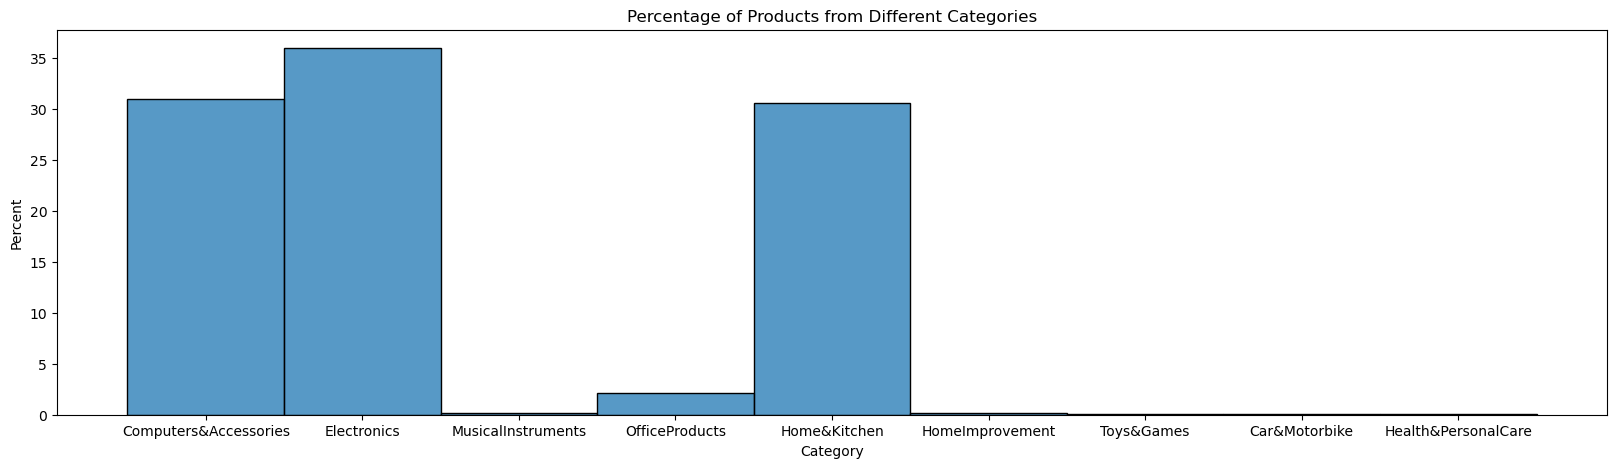

In [67]:
ned = pd.Series(df1['category'].str.split('|', expand=True)[0])
plt.figure(figsize=(20,5))
sns.histplot(data=ned, x=ned, stat='percent')
plt.xlabel('Category')
plt.ylabel('Percent')
plt.title('Percentage of Products from Different Categories')
plt.show()

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage     object
rating                   int32
rating_count            object
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


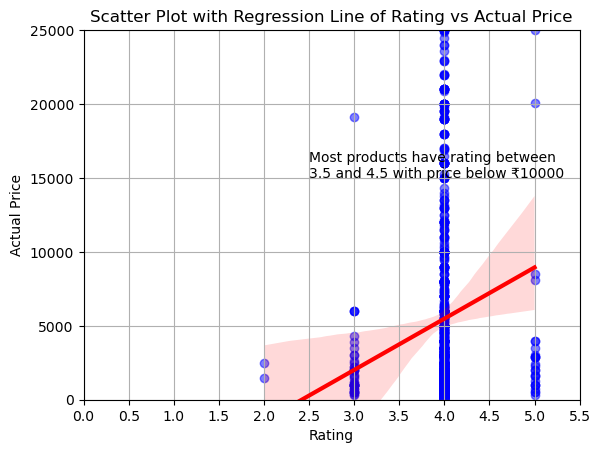

In [73]:
print(df1.dtypes)
df1['actual_price'] = df1['actual_price'].astype(str)
df1['actual_price'] = df1['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
sns.regplot(x='rating', y='actual_price', data=df1,
            scatter_kws={'color': 'blue', 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 3})
plt.xlabel('Rating')
plt.ylabel('Actual Price')
plt.title('Scatter Plot with Regression Line of Rating vs Actual Price')
plt.grid()
plt.xlim(0, 5.5) 
plt.ylim(0, 25000) 
plt.xticks(np.arange(0, 6, 0.5)) 
plt.yticks(np.arange(0, 30000, 5000))
plt.text(2.5, 15000, 'Most products have rating between\n3.5 and 4.5 with price below ₹10000')
plt.show()


### There is a weak positive correlation between rating and price, meaning that higher rated products tend to have higher prices, but not by much The slope of the regression line is small and close to zero, indicating that the change in price with respect to rating is not significant. The average price for a product with rating 4.0 is around ₹5000, according to the regression line.
.

## Refined Research question/interests
**Discount percentage vs rating of the products**
Plotting Rating vs Discount price did not give much of a significant result. Thereby I want to see how does Discount percentage affect the rating of the product. 

**Distribution of ratings across different product categories** 
It can help us to understand how people perceive and evaluate different types of products. It can also help us to identify which categories have higher or lower customer satisfaction and loyalty. For example, if we find that some categories have higher ratings than others, we might want to investigate what factors make those products more appealing and satisfying to the customers. 

**Number of reviews vary with the actual price of the products**
It can help to determine what segment of price attracts most customers. As higher number of reviews=Higher sale of a particular product. 